In [36]:
%matplotlib widget

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [38]:
heart_disease_count = data['HeartDisease'].value_counts()
 
 
print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [39]:
cleaned_data= data[data['HeartDisease'] == 'Yes']
cleaned_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


Harshh started his work from here.

In [77]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [42]:
all_sleep_times = data["SleepTime"].value_counts()
all_sleep_times

SleepTime
7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: count, dtype: int64

In [78]:
# list of suspicious or insignificant sleep times. Considerations - bizzare sleeping time (more than 15 hours or less than 3 hours) and if no. of row data for a particular sleep time > 400.
suspicious_sleep_times = [1.0, 2.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

In [79]:
# cleaning data by removing data relating to suspicious or insignificant sleep times by using the negation mark '~' along with the .isin function
cleaned_sleep_data = data[~data["SleepTime"].isin(suspicious_sleep_times)]
cleaned_sleep_data["SleepTime"].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10.,  3., 11.])

In [80]:
cleaned_sleep_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


2,338 rows of insignificant data removed

In [47]:
only_sleep_data = cleaned_sleep_data[["HeartDisease", "SleepTime"]]
only_sleep_data

,HeartDisease,SleepTime
0,No,5.0
1,No,7.0
2,No,8.0
3,No,6.0
4,No,8.0
...,...,...
319790,Yes,6.0
319791,No,5.0
319792,No,6.0
319793,No,12.0


In [83]:
sleep_time_series = only_sleep_data["SleepTime"].value_counts()
sleep_df1 = pd.DataFrame(sleep_time_series).sort_index().rename(columns={"count": "Total no. of people"})
sleep_df1

,Total no. of people
SleepTime,
3.0,1992
4.0,7750
5.0,19184
6.0,66721
7.0,97751
8.0,97602
9.0,16041
10.0,7796
11.0,415


In [84]:
abc = only_sleep_data.groupby(["SleepTime"], as_index=False).value_counts()

sleep_df2 = pd.DataFrame(abc)
sleep_df2

,SleepTime,HeartDisease,count
0,3.0,No,1645
1,3.0,Yes,347
2,4.0,No,6570
3,4.0,Yes,1180
4,5.0,No,17154
5,5.0,Yes,2030
6,6.0,No,61294
7,6.0,Yes,5427
8,7.0,No,91426
9,7.0,Yes,6325


In [85]:
sleep_df2_yes = sleep_df2[sleep_df2["HeartDisease"]=="Yes"]
sleep_df2_yes = sleep_df2_yes[["SleepTime", "count"]].rename(columns={"count":"No. of people having Heart Disease"}).set_index(["SleepTime"])
sleep_df2_yes

,No. of people having Heart Disease
SleepTime,
3.0,347
4.0,1180
5.0,2030
6.0,5427
7.0,6325
8.0,8358
9.0,1696
10.0,1165
11.0,73


In [86]:
sleep_df2_no = sleep_df2[sleep_df2["HeartDisease"]=="No"]
sleep_df2_no = sleep_df2_no[["SleepTime", "count"]].rename(columns={"count":"No. of people NOT having Heart Disease"}).set_index(["SleepTime"])
sleep_df2_no

,No. of people NOT having Heart Disease
SleepTime,
3.0,1645
4.0,6570
5.0,17154
6.0,61294
7.0,91426
8.0,89244
9.0,14345
10.0,6631
11.0,342


In [87]:
sleep_df = pd.merge(sleep_df2_yes, sleep_df2_no, how='outer', on="SleepTime")
sleep_df = pd.merge(sleep_df, sleep_df1, how='outer', on="SleepTime")
sleep_df

,No. of people having Heart Disease,No. of people NOT having Heart Disease,Total no. of people
SleepTime,,,
3.0,347,1645,1992
4.0,1180,6570,7750
5.0,2030,17154,19184
6.0,5427,61294,66721
7.0,6325,91426,97751
8.0,8358,89244,97602
9.0,1696,14345,16041
10.0,1165,6631,7796
11.0,73,342,415


In [88]:
sleep_df["Percentage of people having Heart Disease"] = round((sleep_df["No. of people having Heart Disease"]/sleep_df["Total no. of people"])*100, 2)
sleep_df["Percentage of people NOT having Heart Disease"] = round((sleep_df["No. of people NOT having Heart Disease"]/sleep_df["Total no. of people"])*100, 2)
sleep_df

,No. of people having Heart Disease,No. of people NOT having Heart Disease,Total no. of people,Percentage of people having Heart Disease,Percentage of people NOT having Heart Disease
SleepTime,,,,,
3.0,347,1645,1992,17.42,82.58
4.0,1180,6570,7750,15.23,84.77
5.0,2030,17154,19184,10.58,89.42
6.0,5427,61294,66721,8.13,91.87
7.0,6325,91426,97751,6.47,93.53
8.0,8358,89244,97602,8.56,91.44
9.0,1696,14345,16041,10.57,89.43
10.0,1165,6631,7796,14.94,85.06
11.0,73,342,415,17.59,82.41


In [89]:
final_sleep_df = sleep_df[["Percentage of people having Heart Disease", "Percentage of people NOT having Heart Disease"]]
final_sleep_df

,Percentage of people having Heart Disease,Percentage of people NOT having Heart Disease
SleepTime,,
3.0,17.42,82.58
4.0,15.23,84.77
5.0,10.58,89.42
6.0,8.13,91.87
7.0,6.47,93.53
8.0,8.56,91.44
9.0,10.57,89.43
10.0,14.94,85.06
11.0,17.59,82.41


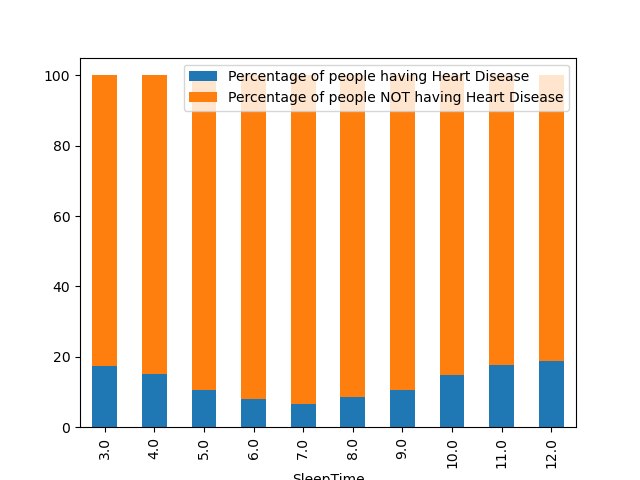

In [90]:
final_sleep_df.plot(kind="bar", stacked=True)
plt.show()